In [1]:
%load_ext autoreload
%autoreload complete

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from matplotlib_inline.backend_inline import set_matplotlib_formats
from tqdm.notebook import tqdm

set_matplotlib_formats("svg")

In [13]:
import json

from src.paths import external_data

with open(external_data / "mediacloud/protest_news_predicted.jsonl") as f:
    items = [json.loads(line) for line in tqdm(f)]

0it [00:00, ?it/s]

In [14]:
len(items)

20879

In [16]:
climate_items = [i for i in items if "Klima" in i["title"] or "Klima" in i["text"]]
len(climate_items)

1871

Annotation with GPT3.5 would cost 3 euros.
With GPT4 it would be 50 euros, assuming 1000 tokens per text, but maybe that is too high an estimate.

In [24]:
texts = [i["title"] + " " + i["text"] for i in climate_items]
np.median([len(list(i.split())) for i in texts]) * len(texts)

686657.0

Well, ~27 euros with GPT4.

<Axes: xlabel='date'>

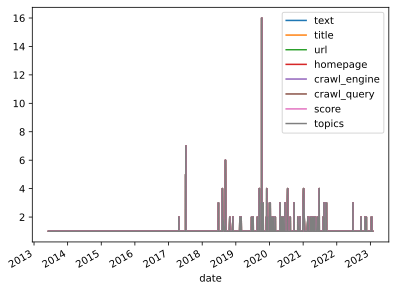

In [18]:
df = pd.DataFrame(climate_items)
df["date"] = pd.to_datetime(df["date"])
df.groupby("date").count().plot()